# 作業目標:
    
    建立一個網路模型

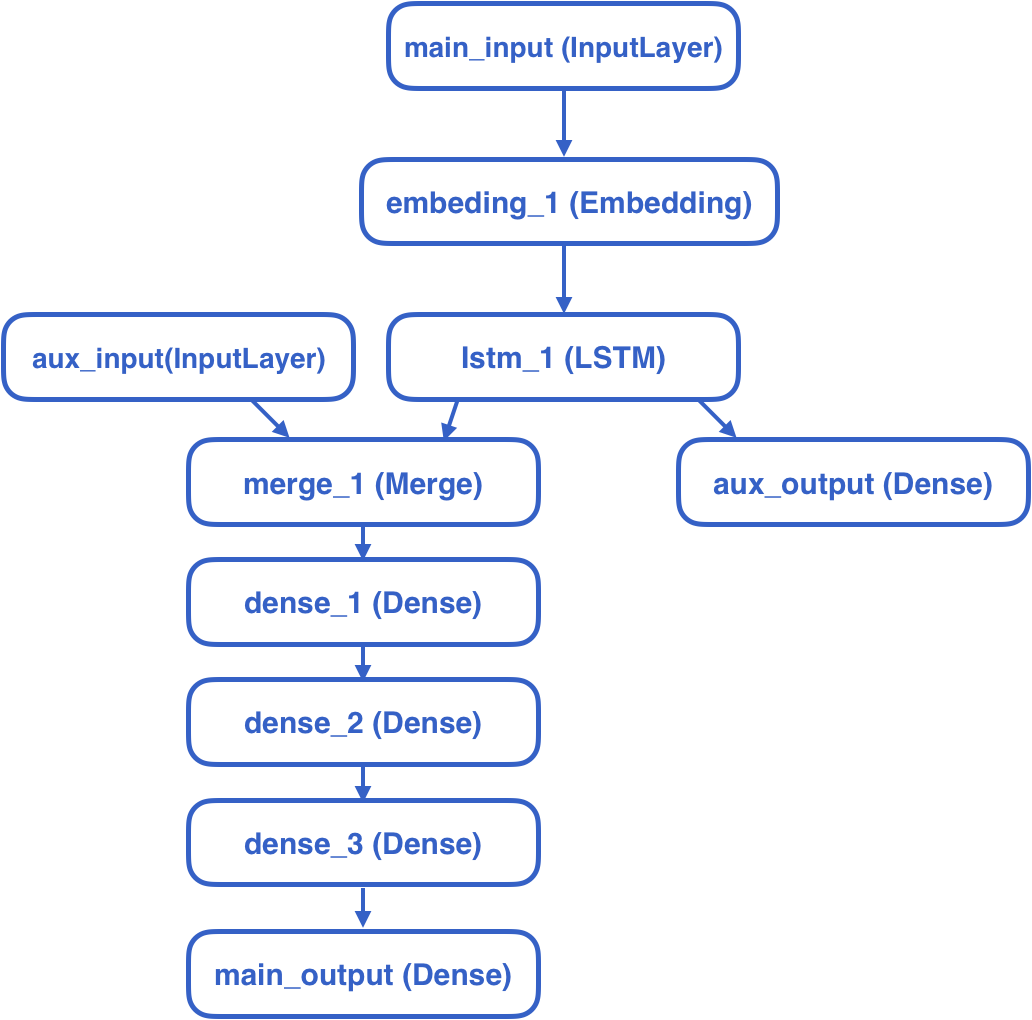

# 作業重點:

請修改 Name 中, 自定義的 Layer 名稱

增加一層全連階層

宣告 MODEL API, 分別採用自行定義的 Input/Output Layer

model.summary 查看 Layers stack

In [ ]:
from keras.layers import Input, Embedding, LSTM, Dense
from keras.models import Model

#主要輸入接收新聞標題本身，即一個整數序列（每個整數編碼一個詞）。
#這些整數在1 到10,000 之間（10,000 個詞的詞彙表），且序列長度為100 個詞
#宣告一個 NAME 去定義Input
self_defined_input = Input(shape=(100,), dtype='int32', name='self_defined_input')


# Embedding 層將輸入序列編碼為一個稠密向量的序列，
# 每個向量維度為 512。
x = Embedding(output_dim=512, input_dim=10000, input_length=100)(self_defined_input)

# LSTM 層把向量序列轉換成單個向量，
# 它包含整個序列的上下文信息
lstm_out = LSTM(32)(x)

In [ ]:
#插入輔助損失，使得即使在模型主損失很高的情況下，LSTM 層和Embedding 層都能被平穩地訓練
self_defined_aux_output = Dense(1, activation='sigmoid', name='self_defined_aux_output')(lstm_out)

In [ ]:
#輔助輸入數據與LSTM 層的輸出連接起來，輸入到模型
import keras
news_input = Input(shape=(5,), name='news_input')
x = keras.layers.concatenate([lstm_out, news_input])


# 堆疊多個全連接網路層
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
#作業解答: 新增兩層
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
# 最後添加主要的邏輯回歸層
self_defined_main_output = Dense(1, activation='sigmoid', name='self_defined_main_output')(x)

In [ ]:
# 宣告 MODEL API, 分別採用自行定義的 Input/Output Layer
model = Model(inputs=[self_defined_input, news_input], outputs=[self_defined_main_output, self_defined_aux_output])

In [ ]:
model.compile(optimizer='adam',
              loss={'main_output': 'binary_crossentropy', 'aux_out': 'binary_crossentropy'},
              loss_weights={'main_output': 1., 'aux_out': 0.2})

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
self_defined_input (InputLayer) [(None, 100)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 100, 512)     5120000     self_defined_input[0][0]         
__________________________________________________________________________________________________
lstm (LSTM)                     (None, 32)           69760       embedding[0][0]                  
__________________________________________________________________________________________________
news_input (InputLayer)         [(None, 5)]          0                                            
______________________________________________________________________________________________